In [8]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
from plot_post import plot_post
import math

In [9]:
clusters = 3

n_cluster = [100, 100, 100]
n_total = sum(n_cluster)

medias = [3.14, 21, 42]
sigmas = [1, 1, 1]

mezcla = []
for cluster in range(clusters):
    datos = np.random.normal(medias[cluster], sigmas[cluster] , n_cluster[cluster])
    mezcla.extend(datos)

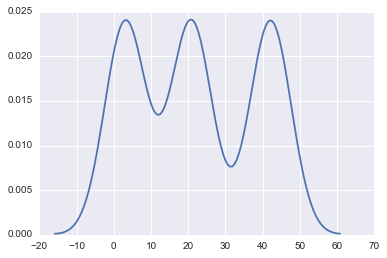

In [10]:
sns.kdeplot(np.array(mezcla));

In [11]:
with pm.Model() as model:
    # Medias de los Gaussianas
    means = pm.Normal('means', mu=[0]*clusters, sd=15, shape=clusters)
    # Desviación estándar de las Gaussianas
    sd = pm.Uniform('sd', lower=0, upper=20, shape=clusters)

    # asignamos cada observación a un grupo con probabilidad p
    p = pm.Dirichlet('p', a=np.ones(clusters), shape=clusters)
    category = pm.Categorical('category', p=p, shape=n_total)

    # likelihood 
    points = pm.Normal('obs', mu=means[category], sd=sd[category], observed=mezcla)
    # muestreamos
    step1 = pm.Metropolis(vars=[p, sd, means])
    step2 = pm.ElemwiseCategoricalStep(vars=[category], values=[0, 1, 2])
    trace = pm.sample(10000, step=[step1, step2])

Applied interval-transform to sd and added transformed sd_interval to model.
Applied stickbreaking-transform to p and added transformed p_stickbreaking to model.
 [-----------------80%----------        ] 8066 of 10000 complete in 65.1 sec**OUTPUT MUTED**

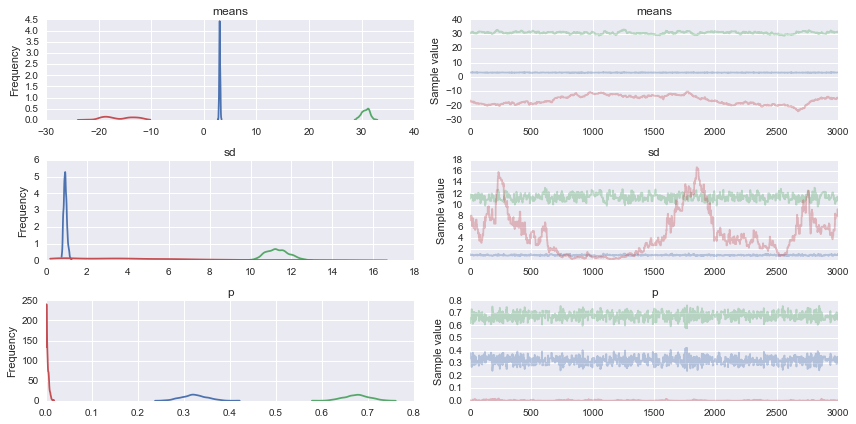

In [12]:
cadena = trace[7000::]
varnames = ['means', 'sd', 'p']
pm.plots.traceplot(cadena, varnames);

In [13]:
pm.df_summary(cadena, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
means__0,3.031030,0.098185,0.004048,2.853480,3.238535
means__1,30.785106,0.767435,0.068079,29.103594,32.016942
means__2,-16.117427,3.042528,0.301726,-20.554311,-10.732477
sd__0,0.941458,0.080368,0.004439,0.802194,1.111309
sd__1,11.318566,0.572429,0.031779,10.271639,12.433128
sd__2,4.750326,3.788432,0.372037,0.251091,12.727528
p__0,0.322001,0.027983,0.001158,0.272043,0.379426
p__1,0.674911,0.027941,0.001166,0.617773,0.724498
p__2,0.003088,0.002843,0.000232,0.000040,0.008947
